In [29]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

In [3]:
X_train, X_test, y_train, y_test = newsgroups_train.data, newsgroups_test.data, newsgroups_train.target, newsgroups_test.target

In [4]:
def tokenizer(text):
    reg_tokens = RegexpTokenizer(r"[\w']{2,}").tokenize(text.lower())
    words = [word for word in reg_tokens if (word not in set(stopwords.words('english'))) and len(word) >= 2]
    tokens = [WordNetLemmatizer().lemmatize(token) for token in words]
    return tokens

In [5]:
tfidf = TfidfVectorizer(tokenizer=tokenizer, max_features=10000, min_df=3, max_df=0.5, ngram_range=(1, 2))
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)
print(X_train_tf.shape, X_test_tf.shape)

c:\Coding\Local\python_text_mining\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(2034, 10000) (1353, 10000)


In [6]:
logreg_clf = LogisticRegression(max_iter=1000, C=3)
logreg_clf.fit(X_train_tf, y_train)
print(logreg_clf.score(X_train_tf, y_train), logreg_clf.score(X_test_tf, y_test))

0.9739429695181907 0.7605321507760532


In [7]:
pca = PCA(n_components=2000, random_state=0)
X_train_pca = pca.fit_transform(X_train_tf)
X_test_pca = pca.transform(X_test_tf)
print(f'{pca.explained_variance_ratio_.sum():.3f}')
print(X_train_pca.shape, X_test_pca.shape)

1.000
(2034, 2000) (1353, 2000)


In [8]:
logreg_clf = LogisticRegression(max_iter=1000, C=3)
logreg_clf.fit(X_train_pca, y_train)
print(logreg_clf.score(X_train_pca, y_train), logreg_clf.score(X_test_pca, y_test))

0.9739429695181907 0.7605321507760532


In [9]:
pca = PCA(n_components=500, random_state=0)
X_train_pca = pca.fit_transform(X_train_tf)
X_test_pca = pca.transform(X_test_tf)
print(f'{pca.explained_variance_ratio_.sum():.3f}')
print(X_train_pca.shape, X_test_pca.shape)

0.577
(2034, 500) (1353, 500)


In [10]:
logreg_clf = LogisticRegression(max_iter=1000, C=3)
logreg_clf.fit(X_train_pca, y_train)
print(logreg_clf.score(X_train_pca, y_train), logreg_clf.score(X_test_pca, y_test))

0.9306784660766961 0.7634885439763488


In [11]:
svd = TruncatedSVD(n_components=2000, random_state=0)
X_train_lsa = svd.fit_transform(X_train_tf)
X_test_lsa = svd.transform(X_test_tf)
print(f'{svd.explained_variance_ratio_.sum():.3f}')
print(X_train_lsa.shape, X_test_lsa.shape)

1.000
(2034, 2000) (1353, 2000)


In [12]:
logreg_clf = LogisticRegression(max_iter=1000, C=3)
logreg_clf.fit(X_train_lsa, y_train)
print(logreg_clf.score(X_train_lsa, y_train), logreg_clf.score(X_test_lsa, y_test))

0.9739429695181907 0.7605321507760532


In [13]:
svd = TruncatedSVD(n_components=500, random_state=0)
X_train_lsa = svd.fit_transform(X_train_tf)
X_test_lsa = svd.transform(X_test_tf)
print(f'{svd.explained_variance_ratio_.sum():.3f}')
print(X_train_lsa.shape, X_test_lsa.shape)

0.572
(2034, 500) (1353, 500)


In [14]:
logreg_clf = LogisticRegression(max_iter=1000, C=3)
logreg_clf.fit(X_train_lsa, y_train)
print(logreg_clf.score(X_train_lsa, y_train), logreg_clf.score(X_test_lsa, y_test))

0.928220255653884 0.7664449371766445


In [15]:
sim_result = cosine_similarity([X_train_lsa[0]], X_train_lsa)
print(sorted(sim_result[0].round(2), reverse=True)[:20])
sim_index = (-sim_result[0]).argsort()
print(sim_index[:20])
sim_labels = [y_train[i] for i in sim_index[:20]]
print(sim_labels)

[np.float64(1.0), np.float64(0.64), np.float64(0.46), np.float64(0.41), np.float64(0.4), np.float64(0.39), np.float64(0.38), np.float64(0.37), np.float64(0.37), np.float64(0.36), np.float64(0.35), np.float64(0.34), np.float64(0.34), np.float64(0.33), np.float64(0.32), np.float64(0.32), np.float64(0.31), np.float64(0.3), np.float64(0.3), np.float64(0.3)]
[   0 1575 1892  501 1209 1324  790 1995 1490  998  892  537 1290  783
  874   25  867 1038 1957 1736]
[np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]


In [16]:
svd = TruncatedSVD(n_components=20, random_state=0)
X_train_lsa = svd.fit_transform(X_train_tf)
X_test_lsa = svd.transform(X_test_tf)
print(f'{svd.explained_variance_ratio_.sum():.3f}')
print(X_train_lsa.shape, X_test_lsa.shape)

0.068
(2034, 20) (1353, 20)


In [17]:
terms = tfidf.get_feature_names_out()
def get_topics(model, feature_names, n=10):
    for i, topic in enumerate(model.components_):
        print(f'Topic {i+1}: {[feature_names[i] for i in topic.argsort()[:-n-1:-1]]}')
get_topics(svd, terms)

Topic 1: ['would', 'one', 'god', 'people', 'think', 'space', 'know', 'like', 'say', 'time']
Topic 2: ['god', 'christian', 'jesus', 'people', 'bible', 'say', 'religion', 'belief', 'believe', 'atheist']
Topic 3: ['space', 'nasa', 'launch', 'orbit', 'satellite', 'shuttle', 'year', 'moon', 'lunar', 'mission']
Topic 4: ['vice ico', 'ico', 'ico tek', 'tek com', 'tek', 'bobbe', 'bobbe vice', 'bronx away', 'beauchaine bobbe', 'said queen']
Topic 5: ['god', 'space', 'jesus', 'christian', 'file', 'image', 'atheism', 'bible', 'nasa', 'belief']
Topic 6: ['objective', 'image', 'file', 'morality', 'system', 'moral', 'value', 'format', 'objective morality', 'color']
Topic 7: ['file', 'format', 'image', 'cview', 'people', 'tiff', 'think', 'bit', 'temp', 'mary']
Topic 8: ['thanks', 'file', 'space', 'format', 'know', 'anyone', 'please', 'anyone know', 'objective', 'advance']
Topic 9: ['god', 'driver', 'card', 'mode', 'color', 'window', 'would', 'vesa', 'space', 'thanks']
Topic 10: ['nasa', 'mary', 'real

In [24]:
t_words = np.diag(svd.singular_values_).dot(svd.components_).T
print(t_words.shape)
source = t_words[np.where(tfidf.get_feature_names_out() == 'space')[0][0]]
print(np.where(tfidf.get_feature_names_out() == 'space')[0][0], '/', source)

(10000, 20)
8381 / [ 0.73775859 -0.54926486  1.25085754  0.48323466  0.58995416  0.00628015
 -0.18966604  0.39216485  0.25679458 -0.18128572  0.13179415 -0.41051812
  0.42526886 -0.27665194 -0.20196768  0.00146249  0.06106144 -0.07739582
  0.22847371  0.17584845]


In [27]:
sim_result = cosine_similarity([source], t_words)
print(sorted(sim_result[0].round(2), reverse=True)[:20])
sim_index = (-sim_result[0]).argsort()[:20]
sim_labels = [tfidf.get_feature_names_out()[i] for i in sim_index]
print(sim_labels)

[np.float64(1.0), np.float64(0.98), np.float64(0.98), np.float64(0.97), np.float64(0.97), np.float64(0.97), np.float64(0.97), np.float64(0.97), np.float64(0.97), np.float64(0.96), np.float64(0.96), np.float64(0.96), np.float64(0.96), np.float64(0.96), np.float64(0.96), np.float64(0.96), np.float64(0.96), np.float64(0.96), np.float64(0.95), np.float64(0.95)]
['space', 'long duration', 'manned space', 'huntsville', 'space activity', 'space exploration', 'hubble telescope', 'meteor', 'space shuttle', 'ksc', 'astronaut', 'exploration', 'administration', 'space foundation', 'spinoffs', 'npo', 'office', 'bi', 'aerospace industry', 'space group']


In [30]:
tsne = TSNE(n_components=2, random_state=0, init='random')
X_train_tsne = tsne.fit_transform(X_train_tf)
print(X_train_tsne.shape)

(2034, 2)


In [31]:
def tsne_graph(tsne_data, label, lim=None):
    colors = {0:'blue', 1:'red', 2:'green', 3:'purple'}
    x = tsne_data[:, 0]
    y = tsne_data[:, 1]
    plt.figure(figsize=(12, 8))
    if lim == None:
        lim = [min(x), max(x), min(y), max(y)]
    plt.xlim(lim[0], lim[1])
    plt.ylim(lim[2], lim[3])
    for i in range(len(x)):
        if (lim[0] < x[i] < lim[1]) and (lim[2] < y[i] < lim[3]):
            plt.text(x[i], y[i], label[i], color = colors[label[i]])
    plt.show()

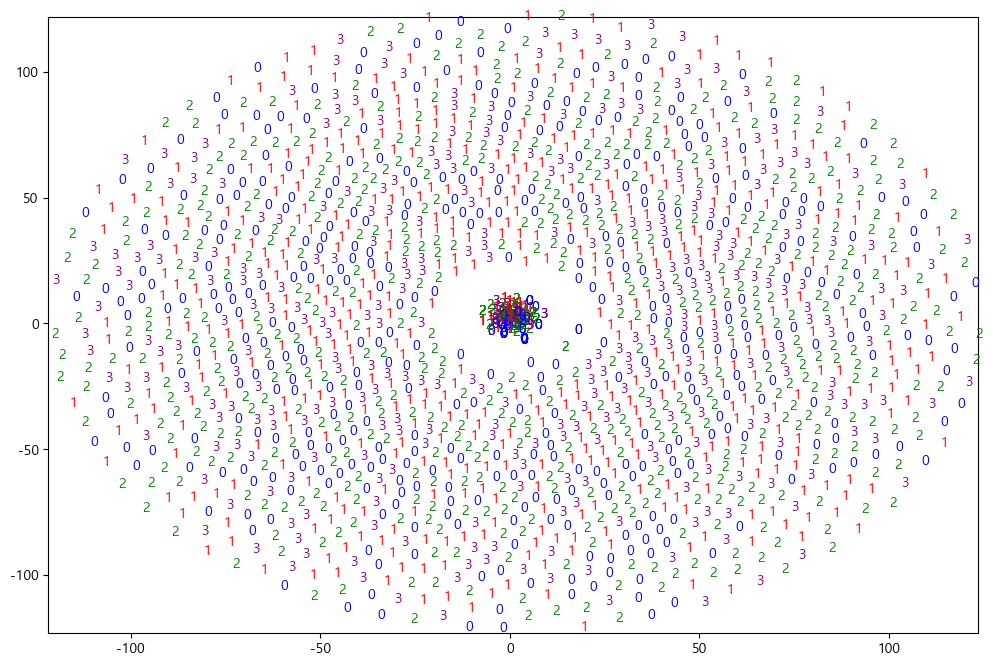

In [32]:
tsne_graph(X_train_tsne, y_train)

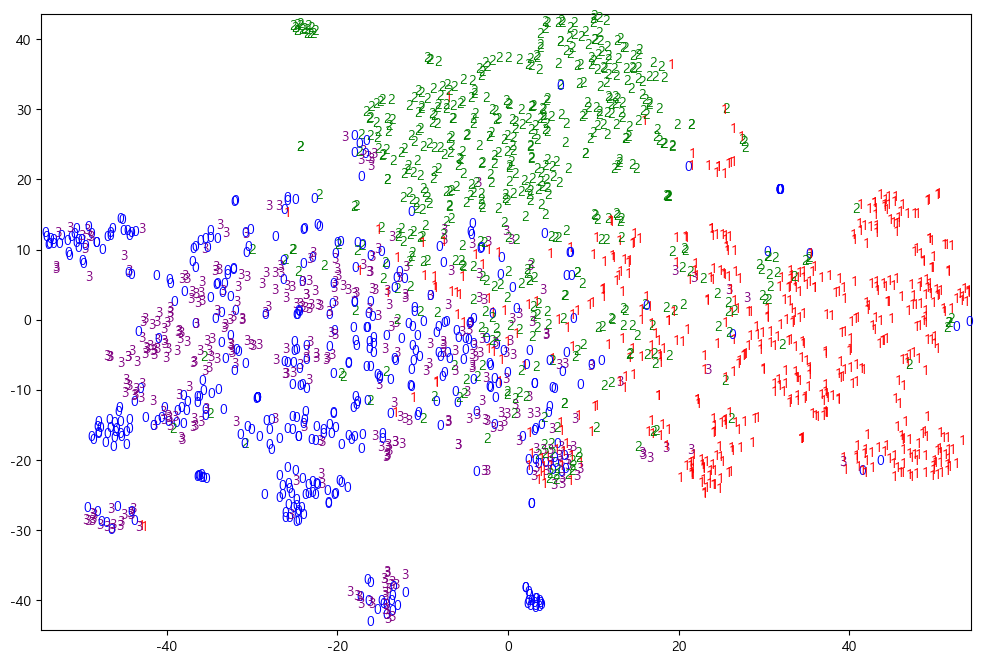

In [33]:
X_train_lsa_tsne = tsne.fit_transform(X_train_lsa)

tsne_graph(X_train_lsa_tsne, y_train)